In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decreaseb

C:\Users\user\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [28]:
df = pd.read_csv('Automobile_data.csv', usecols=['highway-mpg', 'city-mpg', 'stroke', 'price'])

In [29]:
df.head()

,stroke,city-mpg,highway-mpg,price
0,2.68,21,27,13495
1,2.68,21,27,16500
2,3.47,19,26,16500
3,3.4,24,30,13950
4,3.4,18,22,17450


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
stroke         205 non-null object
city-mpg       205 non-null int64
highway-mpg    205 non-null int64
price          205 non-null object
dtypes: int64(2), object(2)
memory usage: 6.5+ KB


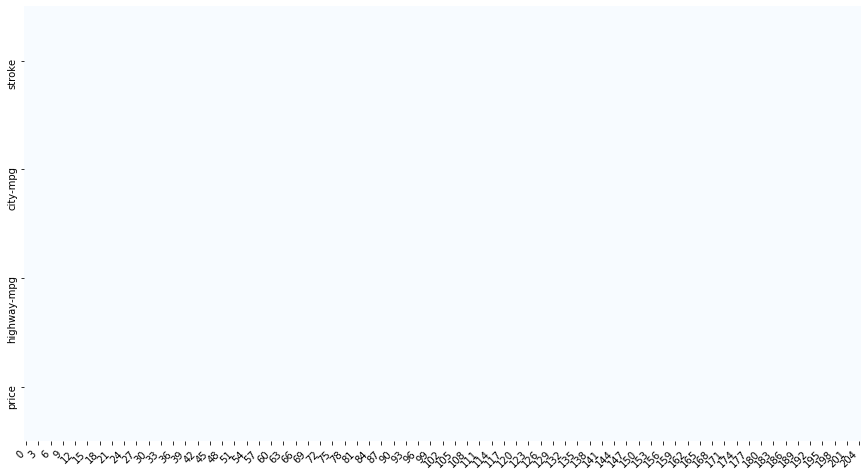

In [31]:
plot_missing_value(df)

In [32]:
X = df.drop(columns="city-mpg")
y = df["city-mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 3), (41, 3), (164,), (41,))

In [33]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [35]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["highway-mpg"]),
    ('categoric', cat_pipe(encoder='onehot'), ["price", "stroke"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

model = GridSearchCV(pipeline, gsp.linreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__fit_intercept': True}
0.9999999999998765 0.8793565629133884 0.7689014996667183


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished
